In [3]:
import pandas as pd
import re
from pandas import DataFrame as DF
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import gensim
from gensim import corpora,models
from gensim.models import LdaModel, LsiModel

std_compound=[]
avg_neg=[]
avg_wc=[]
sim=[]

In [40]:
file = open(r"C:\Users\chuny\Desktop\bigdata\project\Data\text\49.txt","r",encoding="utf8")
content=file.read()

In [41]:
content=re.sub(' +',' ',content.replace("\n",""))
st=[(m.start(0), m.end(0)) for m in re.finditer("Interview with",content)]
en=[(m.start(0), m.end(0)) for m in re.finditer("interviewed by",content)]
name1=content[st[0][1]:en[0][0]].split()[0][0]+content[st[0][1]:en[0][0]].split()[-1][0]
n2=re.findall("interviewed by(.+?),",content)[0]
name2=re.findall("[A-Z]",n2)[0]+re.findall("[A-Z]",n2)[-1]

In [42]:
name1

'SM'

In [43]:
name2

'EA'

In [44]:
pattern=name1+"(.+?)"+name2
contentlist=re.findall(pattern,content)
clean=[]
for i in contentlist:
    clean.append(i.replace(": ",""))
df=DF(clean[1:],columns=["response"])
df.head(5)

,response
0,"When I decided to go and do my master’s, it wa..."
1,"It was a great job, because what it actually d..."
2,"It was a pan-African, yes. It was in twenty-si..."
3,"Actually, when I first moved to South Africa, ..."
4,Yes.


In [45]:
neg,neu,pos,compound,count=[],[],[],[],[]
sid = SentimentIntensityAnalyzer()
for sentence in df['response']:
    ss = sid.polarity_scores(sentence)
    neg.append(ss["neg"])
    neu.append(ss["neu"])
    pos.append(ss["pos"])
    compound.append(ss['compound'])
    count.append(len(sentence.split()))
df["neg"]=neg
df["neu"]=neu
df["pos"]=pos
df["compound"]=compound
df["word count"]=count
df.head(5)

,response,neg,neu,pos,compound,word count
0,"When I decided to go and do my master’s, it wa...",0.000,0.984,0.016,0.2144,129
1,"It was a great job, because what it actually d...",0.000,0.942,0.058,0.8851,252
2,"It was a pan-African, yes. It was in twenty-si...",0.012,0.904,0.085,0.8196,162
3,"Actually, when I first moved to South Africa, ...",0.024,0.904,0.072,0.9162,283
4,Yes.,0.000,0.000,1.000,0.4019,1


In [46]:
reviews = df['response'].tolist()
import string
#remove '\r' and punctuations 
new_reviews = []
for review in reviews: 
    for ch in review:
        if ch in string.punctuation:
            review = review.replace(ch,'') #replace punctuation with nothing
        if ch == '\r':
            review = review.replace(ch,' ') #replace \r with space
    new_reviews.append(review) 
    
#remove stop words, to lowercase and tokenize
from nltk.corpus import stopwords
mystopwords = stopwords.words('english')

tokens_list = [[word for word in review.lower().split(' ') if word not in mystopwords and word.isalpha()]
         for review in new_reviews]

#remove words that appear only once
from collections import defaultdict
frequency = defaultdict(int)

for tokens in tokens_list:
    for token in tokens:
        frequency[token] += 1
        
tokens_list = [[token for token in tokens if frequency[token]>1]
              for tokens in tokens_list]
# generate token dictionary class
dictionary = corpora.Dictionary(tokens_list) 
# generate a unique token list 
sort_token = sorted(dictionary.items(),key=lambda k:k[0], reverse = False)
unique_token = [token for (ID,token) in sort_token]
# build a corpus
corpus = [dictionary.doc2bow(tokens) for tokens in tokens_list]
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=10) #fit lda model
topic=pd.DataFrame(lda.get_topics())
topic

,0,1,2,3,4,5,6,7,8,9,...,260,261,262,263,264,265,266,267,268,269
0,0.014770,0.013495,0.005585,0.001196,0.023468,0.004398,0.012504,0.000857,0.000857,0.004418,...,0.000857,0.000857,0.000857,0.000857,0.000857,0.000857,0.000857,0.000902,0.000895,0.000935
1,0.018735,0.011573,0.001929,0.002398,0.003241,0.001929,0.006050,0.001929,0.001929,0.002657,...,0.001929,0.001929,0.001929,0.001929,0.001929,0.001929,0.001929,0.001929,0.001929,0.001929
2,0.040256,0.007799,0.001834,0.003673,0.013349,0.002045,0.005089,0.001674,0.002907,0.018149,...,0.000412,0.000412,0.000412,0.000412,0.000412,0.000412,0.000412,0.000412,0.000412,0.000412
3,0.010338,0.005341,0.002423,0.002423,0.002423,0.002423,0.002423,0.002423,0.002423,0.002423,...,0.007148,0.011267,0.007586,0.008448,0.007222,0.008966,0.019294,0.002423,0.002423,0.002423
4,0.021069,0.016444,0.001355,0.001376,0.004275,0.001278,0.009375,0.003826,0.001278,0.001453,...,0.001278,0.001278,0.001278,0.001278,0.001278,0.001278,0.001278,0.001278,0.001278,0.001278
5,0.030671,0.009513,0.006745,0.002570,0.019335,0.000629,0.006903,0.004178,0.000629,0.011546,...,0.000629,0.000629,0.000629,0.000629,0.000629,0.000629,0.000629,0.001258,0.000999,0.001657
6,0.039130,0.013153,0.007644,0.004129,0.014070,0.003075,0.008827,0.003615,0.006529,0.015331,...,0.000437,0.000437,0.000437,0.000437,0.000437,0.000437,0.000437,0.005054,0.004759,0.005490
7,0.026701,0.014771,0.004812,0.006357,0.020300,0.002142,0.013676,0.000317,0.000312,0.014015,...,0.000608,0.000733,0.000662,0.000594,0.000663,0.000596,0.001013,0.001855,0.001849,0.003342
8,0.036811,0.013448,0.000680,0.000680,0.003265,0.000680,0.003771,0.002044,0.000680,0.004221,...,0.011515,0.016044,0.011212,0.011322,0.011234,0.010741,0.025820,0.002227,0.003112,0.004433
9,0.015671,0.004487,0.003145,0.003476,0.003248,0.002399,0.002399,0.002399,0.002399,0.006476,...,0.005190,0.008159,0.005410,0.004694,0.005686,0.006216,0.011542,0.005150,0.004702,0.005904


In [47]:
lda.print_topics()

[(0,
  '0.028*"really" + 0.025*"challenge" + 0.023*"business" + 0.023*"world" + 0.020*"countries" + 0.020*"people" + 0.016*"different" + 0.015*"time" + 0.015*"able" + 0.014*"laws"'),
 (1,
  '0.028*"look" + 0.020*"affected" + 0.020*"industry" + 0.020*"construction" + 0.019*"able" + 0.016*"good" + 0.015*"company" + 0.015*"affect" + 0.015*"world" + 0.013*"quality"'),
 (2,
  '0.040*"able" + 0.029*"really" + 0.025*"money" + 0.019*"always" + 0.019*"think" + 0.018*"put" + 0.018*"go" + 0.015*"grow" + 0.015*"projects" + 0.014*"operate"'),
 (3,
  '0.051*"always" + 0.027*"yes" + 0.027*"absolutely" + 0.023*"get" + 0.019*"stem" + 0.012*"careers" + 0.011*"girls" + 0.010*"able" + 0.010*"starting" + 0.010*"one"'),
 (4,
  '0.029*"look" + 0.027*"yes" + 0.022*"good" + 0.021*"able" + 0.018*"industry" + 0.018*"world" + 0.017*"way" + 0.017*"company" + 0.016*"africa" + 0.016*"affected"'),
 (5,
  '0.031*"able" + 0.029*"think" + 0.023*"really" + 0.019*"business" + 0.018*"first" + 0.017*"world" + 0.016*"us" + 0

In [48]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda, texts=tokens_list, 
                                     dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.612757967333706


In [49]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=models.LdaModel(corpus, id2word=dictionary,num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

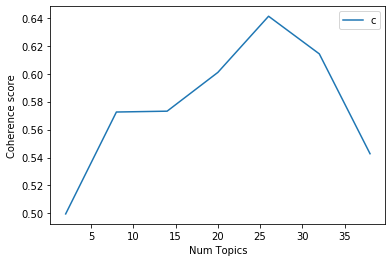

In [50]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=tokens_list, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [53]:
key_list=[]
for i in range(10):
    a=topic.iloc[i].sort_values(ascending = False)[:10].index.tolist()
    key_list.append(a)
key_list

[[18, 35, 4, 68, 39, 60, 40, 22, 0, 53],
 [199, 219, 165, 159, 0, 45, 90, 218, 68, 61],
 [0, 18, 80, 86, 116, 171, 9, 138, 149, 168],
 [86, 84, 155, 135, 266, 259, 261, 0, 150, 57],
 [199, 84, 45, 0, 165, 68, 83, 90, 1, 219],
 [0, 116, 18, 4, 97, 68, 180, 181, 25, 135],
 [0, 27, 116, 135, 60, 25, 9, 18, 4, 44],
 [116, 0, 18, 4, 181, 145, 1, 57, 9, 15],
 [0, 135, 266, 57, 71, 258, 181, 259, 261, 1],
 [0, 135, 27, 266, 57, 137, 68, 49, 145, 17]]

In [54]:
a,b,c,d,e,f,g,h,i,j="","","","","","","","","",""
for x in range(10):
    a+=str(key_list[0][x])+" "
    b+=str(key_list[1][x])+" "
    c+=str(key_list[2][x])+" "
    d+=str(key_list[3][x])+" "
    e+=str(key_list[4][x])+" "
    f+=str(key_list[5][x])+" "
    g+=str(key_list[6][x])+" "
    h+=str(key_list[7][x])+" "
    i+=str(key_list[8][x])+" "
    j+=str(key_list[9][x])+" "
li=[a,b,c,d,e,f,g,h,i,j]

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(li)
doc_term_matrix = sparse_matrix.todense()
df3 = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=range(10))
df3

,116,135,137,138,145,149,15,150,155,159,...,60,61,68,71,80,83,84,86,90,97
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,1,0
5,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,0,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [56]:
from sklearn.metrics.pairwise import cosine_similarity
x=pd.DataFrame(cosine_similarity(df3, df3))
similarity=(x.values.sum()-10)/90

In [57]:
x

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.117851,0.125000,0.000000,0.125000,0.250000,0.267261,0.144338,0.000000,0.117851
1,0.117851,1.000000,0.000000,0.000000,0.707107,0.117851,0.000000,0.000000,0.000000,0.111111
2,0.125000,0.000000,1.000000,0.117851,0.000000,0.250000,0.267261,0.288675,0.000000,0.000000
3,0.000000,0.000000,0.117851,1.000000,0.117851,0.117851,0.125988,0.136083,0.589256,0.333333
4,0.125000,0.707107,0.000000,0.117851,1.000000,0.125000,0.000000,0.000000,0.000000,0.117851
5,0.250000,0.117851,0.250000,0.117851,0.125000,1.000000,0.534522,0.433013,0.250000,0.235702
6,0.267261,0.000000,0.267261,0.125988,0.000000,0.534522,1.000000,0.308607,0.133631,0.251976
7,0.144338,0.000000,0.288675,0.136083,0.000000,0.433013,0.308607,1.000000,0.288675,0.272166
8,0.000000,0.000000,0.000000,0.589256,0.000000,0.250000,0.133631,0.288675,1.000000,0.353553
9,0.117851,0.111111,0.000000,0.333333,0.117851,0.235702,0.251976,0.272166,0.353553,1.000000


In [1366]:
a=df.describe()["compound"][2]
b=df.describe()["neg"][1]
c=df.describe()["word count"][1]
std_compound.append(a)
avg_neg.append(b)
avg_wc.append(c)
sim.append(similarity)
df2=DF(std_compound,columns=["std_compound"])
df2["avg_neg"]=avg_neg
df2["avg_wc"]=avg_wc
df2["similarity"]=sim
df2.index = df2.index+1
df2

,std_compound,avg_neg,avg_wc,similarity
1,0.592044,0.025765,365.411765,0.304168
2,0.470059,0.051452,76.569892,0.268889
3,0.476004,0.053714,132.214286,0.219334
4,0.501360,0.044029,246.735294,0.476246
5,0.386265,0.010895,102.315789,0.117279
6,0.498690,0.059326,66.415730,0.163854
7,0.641425,0.045545,705.727273,0.533333
8,0.440532,0.015673,136.865385,0.239889
9,0.495981,0.024350,135.316667,0.264334
10,0.660323,0.052050,155.825000,0.144360


In [1367]:
df2.to_csv ("result_FINAL.csv")